# SysCom India- Participatory On Farm Reseach Dataset

### **Import packages : pandas, numpy, seaborn & matplotlib**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

from matplotlib.pyplot import figure

plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Syscom_India_smalldataset

In [5]:
from google.colab import files
uplouded  = files.upload()


Saving Dataset.csv to Dataset.csv


In [6]:
df = pd.read_csv('Dataset.csv')

In [7]:
# Display the data types of each column in the DataFrame
print(df.dtypes)

# Create a table with column names and their data types
column_data_types = pd.DataFrame({'Column Name': df.columns, 'Data Type': df.dtypes})

# Display the table
column_data_types

FarmerName                          object
ID                                   int64
Village                             object
FieldVillage                        object
Zone                                object
                                     ...  
Interviewer                         object
Date_of_2nd_interview               object
Date_of_1st_soil_sampling           object
Date_of_2nd_soil_sampling           object
Date_of_plant_growth_observation    object
Length: 140, dtype: object


,Column Name,Data Type
FarmerName,FarmerName,object
ID,ID,int64
Village,Village,object
FieldVillage,FieldVillage,object
Zone,Zone,object
...,...,...
Interviewer,Interviewer,object
Date_of_2nd_interview,Date_of_2nd_interview,object
Date_of_1st_soil_sampling,Date_of_1st_soil_sampling,object
Date_of_2nd_soil_sampling,Date_of_2nd_soil_sampling,object


In [8]:
# Save the table to a CSV file
column_data_types.to_csv('column_data_types.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('column_data_types.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ***Preparing database: Distribution graphs to check errors in the columns ***

In [9]:
# Distribution plots for numeric data and bar plot of frequencies for non-numerical columns
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('distribution_plots.pdf') as pdf:
  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      plt.figure()
      sns.histplot(df[column], kde=True)
      plt.title(f'Distribution of {column}')
      pdf.savefig()
      plt.close()
    elif pd.api.types.is_object_dtype(df[column]):
      plt.figure()
      df[column].value_counts().plot(kind='bar')
      plt.title(f'Frequency of {column}')
      pdf.savefig()
      plt.close()

files.download('distribution_plots.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Exploring data**

In [10]:
df[:30]

,FarmerName,ID,Village,FieldVillage,Zone,Farmsize,Fieldsize,Field_Farm,Sex,Age,...,SMBC_I_mg_C_kg-1,SMBC_Reading_II,SMBC_Factore_II,SMBC_II_mg_C_kg-1,Date_of_1st_interview,Interviewer,Date_of_2nd_interview,Date_of_1st_soil_sampling,Date_of_2nd_soil_sampling,Date_of_plant_growth_observation
0,Farmer02,2,Kariya,Kariya,Maheshwar,2.02,0.71,35,M,45,...,55.0,7.5,11.0,82.5,19/04/2024,Dharmendra,24/07/2024,15/05/2024,24/07/2024,19/09/2024
1,Farmer02,2,Kariya,Kariya,Maheshwar,2.02,0.71,35,M,45,...,NaN,NaN,NaN,NaN,19/04/2024,Dharmendra,24/07/2024,15/05/2024,24/07/2024,19/09/2024
2,Farmer03,3,Kachhipura,Kachhipura,Kasrawad,2.83,0.16,6,M,45,...,47.3,5.1,11.0,56.1,24/04/2024,Sawan and Andrin,12/08/2024,10/05/2024,18/07/2024,24/09/2024
3,Farmer03,3,Kachhipura,Kachhipura,Kasrawad,2.83,0.16,6,M,45,...,NaN,NaN,NaN,NaN,24/04/2024,Sawan and Andrin,12/08/2024,10/05/2024,18/07/2024,24/09/2024
4,Farmer03,3,Kachhipura,Kachhipura,Kasrawad,2.83,0.16,6,M,45,...,NaN,NaN,NaN,NaN,24/04/2024,Sawan and Andrin,12/08/2024,10/05/2024,18/07/2024,24/09/2024
5,Farmer04,4,Katkur,Katkur,Kasrawad,3.64,0.17,5,M,50,...,85.8,5.5,11.0,60.5,24/04/2024,Sawan and Andrin,17/07/2024,10/05/2024,17/07/2024,24/09/2024
6,Farmer04,4,Katkur,Katkur,Kasrawad,3.64,0.17,5,M,50,...,NaN,NaN,NaN,NaN,24/04/2024,Sawan and Andrin,17/07/2024,10/05/2024,17/07/2024,24/09/2024
7,Farmer04,4,Katkur,Katkur,Kasrawad,3.64,0.17,5,M,50,...,NaN,NaN,NaN,NaN,24/04/2024,Sawan and Andrin,17/07/2024,10/05/2024,17/07/2024,24/09/2024
8,Farmer04,4,Katkur,Katkur,Kasrawad,3.64,0.17,5,M,50,...,NaN,NaN,NaN,NaN,24/04/2024,Sawan and Andrin,17/07/2024,10/05/2024,17/07/2024,24/09/2024
9,Farmer05,5,Bheelgaon,Dongargaon,Kasrawad,1.42,0.76,54,M,41,...,60.5,6.2,11.0,68.2,24/04/2024,Sawan and Andrin,12/08/2024,15/05/2024,19/07/2024,24/09/2024


**Cleaning data base**

# **PCR**

In [12]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=np.number)

# Calculate the Pearson Correlation
correlation_matrix = numerical_columns.corr(method='pearson')

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')

# Download the file
files.download('correlation_matrix.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **PCR graph**

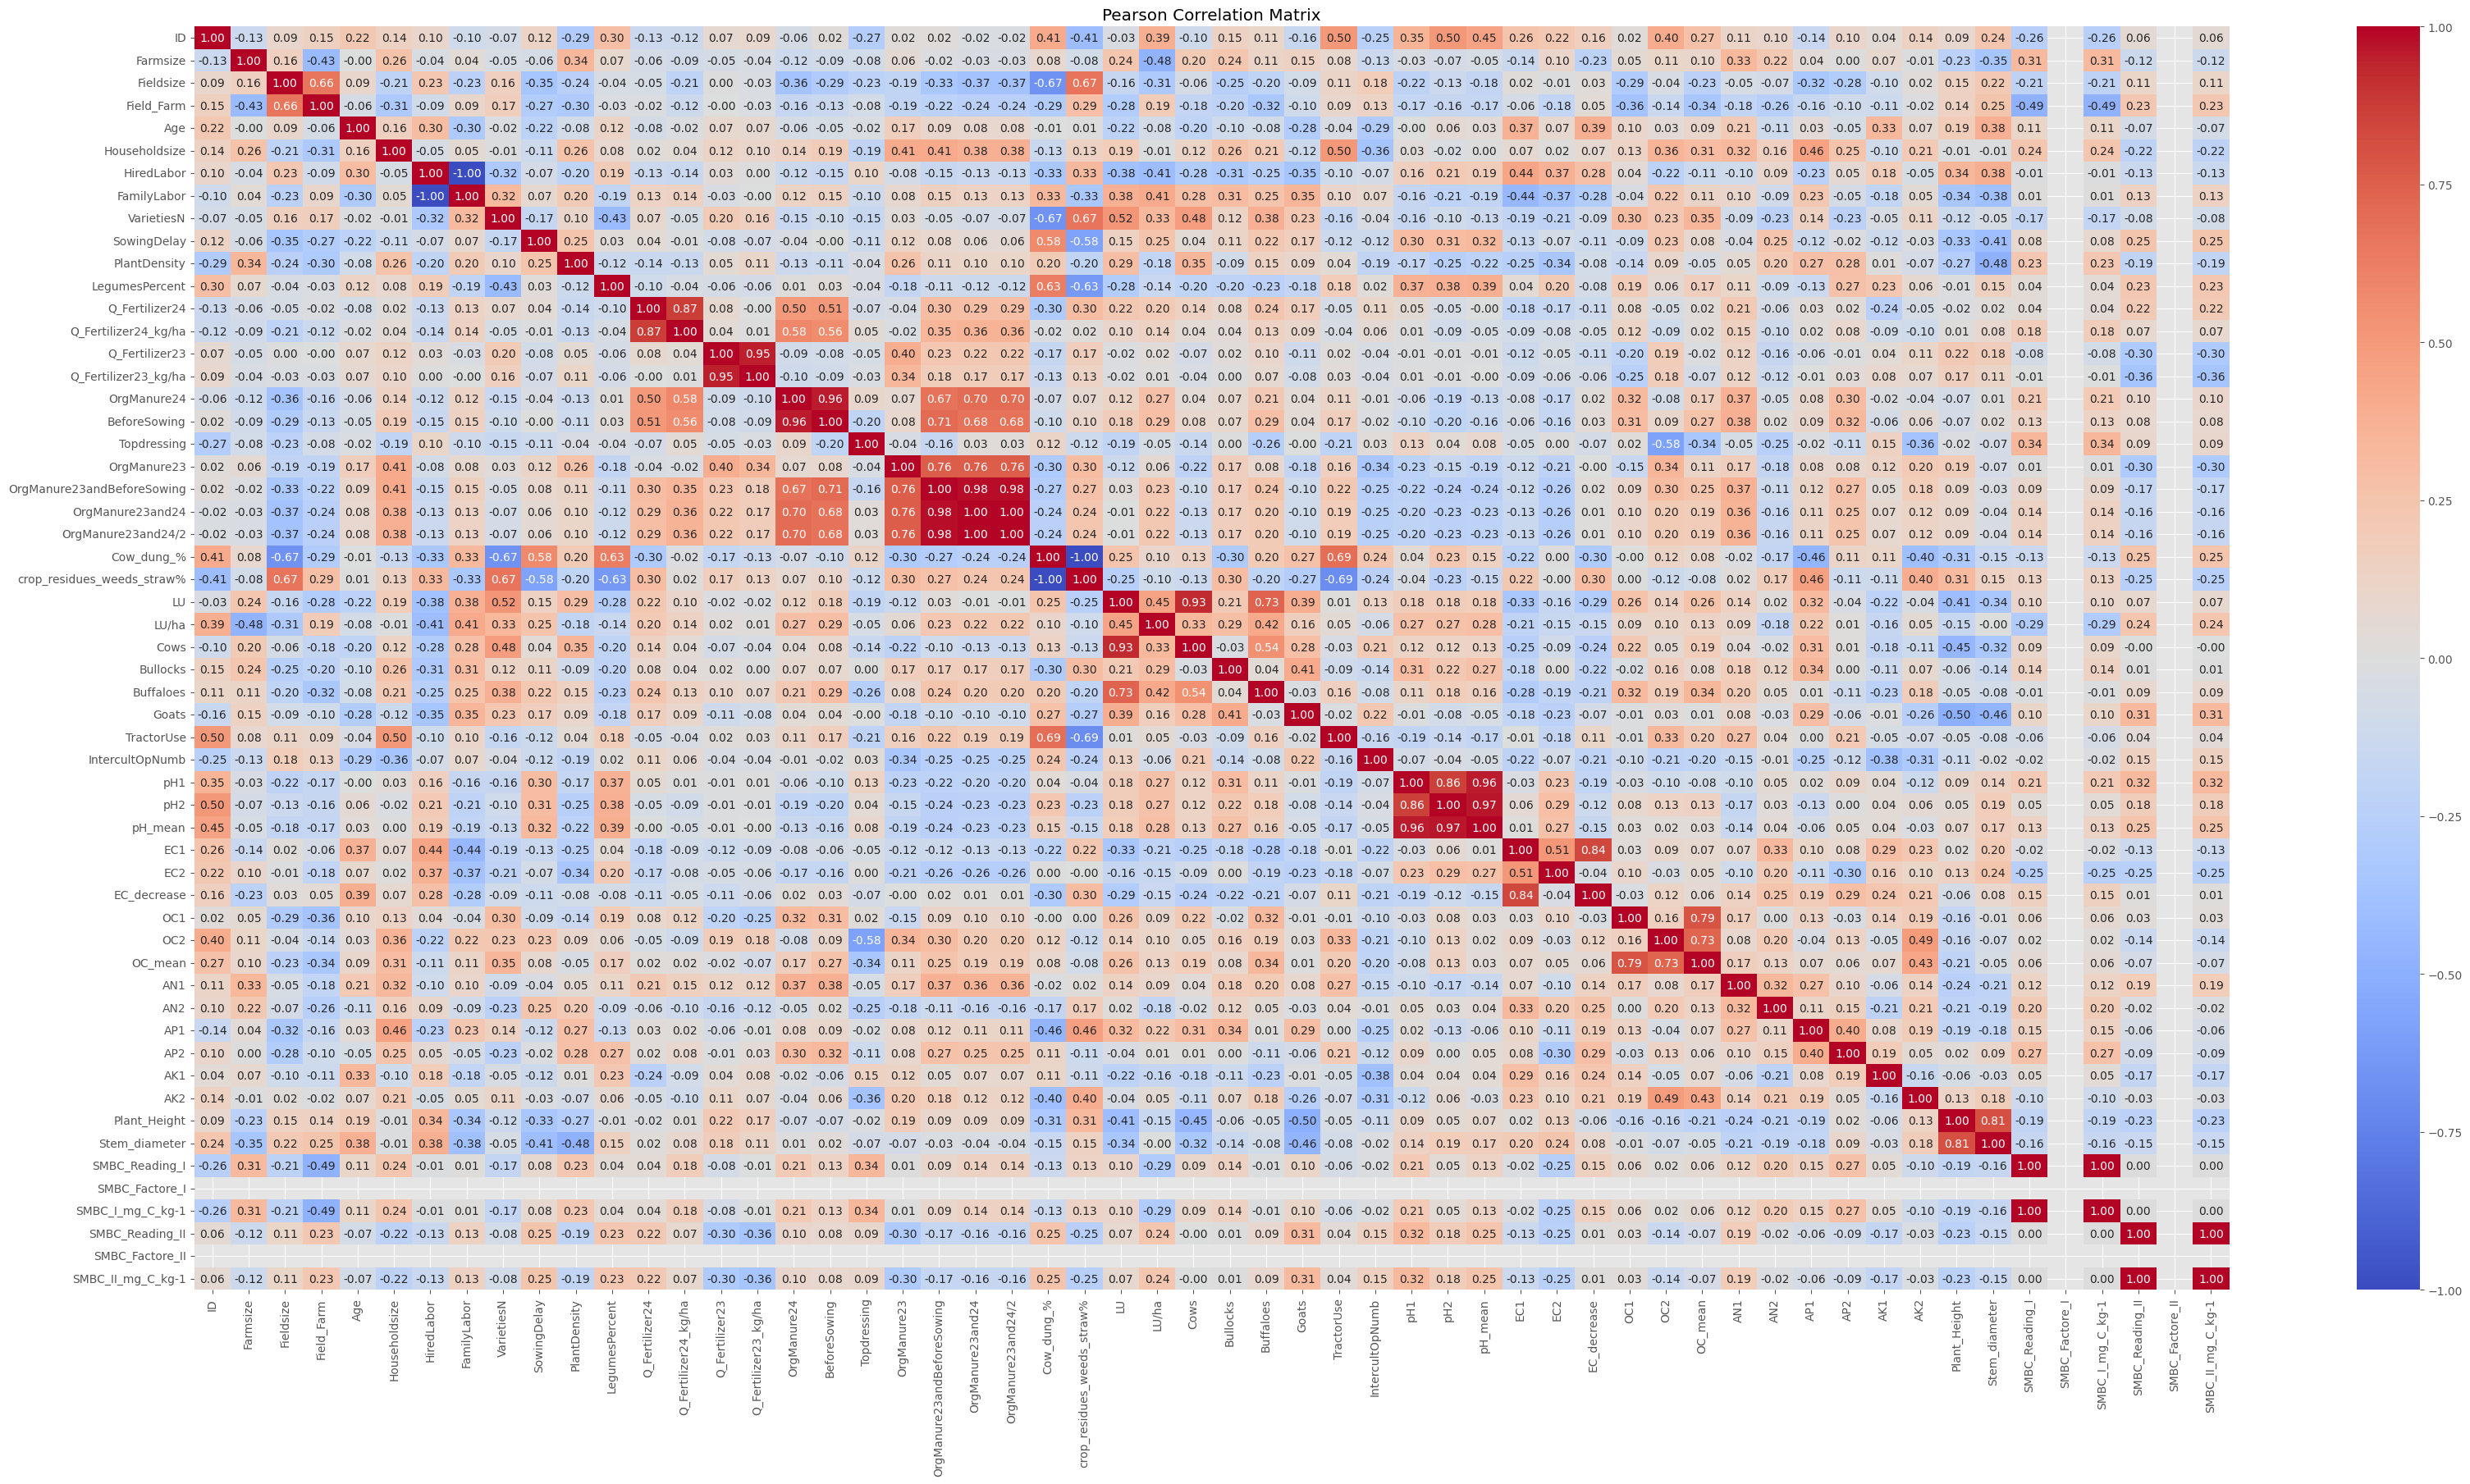

In [14]:
plt.figure(figsize=(40, 20))  # Adjust the figure size!!!
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()



# **Normalization of database**

In [1]:
# New data base called df_3, cleaning the duplicated values of each column considering each 'FarmerName',
#for example, Farmer02 has a duplicated value in column AddIncome, so replace they with a NULL
#but it doesn't have in column What_would_you_do_to_make_your_soil_more_fertile so leave the value.
df_2 = df.copy()

for column in df_2.columns:
  if column != 'FarmerName':
    df_2[column] = df_2.groupby('FarmerName')[column].transform(lambda x: x.drop_duplicates().fillna(np.nan))


# Save the new DataFrame to a CSV file
df_2.to_csv('db_2.csv', index=False)

# Download the new CSV file
files.download('db_2.csv')


NameError: name 'df' is not defined

# Start the real analysis


In [ ]:
group_edu= ['EducationGrouped']
fert= ['How_fertile_is_your_land?.1']
df_2[group_edu, fert].groupby(group_edu).describe()



